In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import seaborn as sns 

dfUser         = pd.read_csv("../applicant_material/user.csv") 
dfJobs         = pd.read_csv("../applicant_material/job_desc.csv") 

dfUser.columns = dfUser.columns.str.replace(r"[v]", "")
column_names   = ['has_applied'] +  [str(entry) for entry in range(1,57)]
dfUser         = dfUser.reindex(columns=column_names)
dfAll          = pd.concat([dfUser, dfJobs], axis=1)


dfJobs.job_title_full = dfJobs.job_title_full.str.replace('(', ' ')
dfJobs.job_title_full = dfJobs.job_title_full.str.replace(')', ' ')
dfJobs.job_title_full = dfJobs.job_title_full.str.lower();

In [85]:
dfUser.head()

,has_applied,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,1,0.620573,0.044620,0.374307,0.958667,0.030897,0.751510,0.349078,0.337132,0.807632,...,0.588725,0.897329,0.738945,0.206182,0.227104,0.811505,0.945988,0.798489,0.148969,0.707921
1,1,0.972502,0.838409,0.038665,0.189126,0.760104,0.989583,0.073514,0.095885,0.890821,...,0.685390,0.761857,0.361112,0.746835,0.855074,0.683701,0.318416,0.703566,0.400617,0.563469
2,1,0.240756,0.564156,0.115911,0.792988,0.712621,0.264505,0.513135,0.978387,0.620669,...,0.657718,0.261883,0.133786,0.677082,0.614898,0.487564,0.256930,0.653874,0.761972,0.976820
3,1,0.004854,0.254976,0.451548,0.553485,0.149240,0.232344,0.305115,0.080069,0.297233,...,0.233331,0.260462,0.201699,0.988853,0.407412,0.242282,0.097724,0.191388,0.516972,0.742984
4,1,0.835250,0.418768,0.630508,0.872926,0.296838,0.091980,0.581444,0.093941,0.612623,...,0.141553,0.708311,0.510310,0.291645,0.605605,0.772735,0.351836,0.932708,0.724384,0.123647


## Correlation

has_applied    1.000000
1              0.024147
2             -0.002485
3              0.049139
4             -0.024490
Name: has_applied, dtype: float64

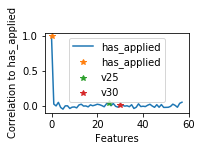

In [86]:
corrTo_has_applied = dfAll.corr().iloc[0,:]
fig,ax = plt.subplots(figsize=(3,2))
plt.plot(range(0,58),corrTo_has_applied[0:])
plt.plot(corrTo_has_applied[0],'*C1', label = 'has_applied')
plt.plot(25,corrTo_has_applied[25],'*C2', label = 'v25')
plt.plot(30,corrTo_has_applied[30],'*C3', label = 'v30')
plt.legend()

plt.ylabel('Correlation to has_applied')
plt.xlabel('Features',)
ax.tick_params(axis="x")
plt.tight_layout()
plt.savefig('results/correlation.pdf')
corrTo_has_applied.head()

In [87]:
## Plot heatmap for cross-correlation
plt.figure(figsize = (10,8))
g = sns.heatmap(dfAll.corr(),annot=False, fmt = ".2f", cmap = "coolwarm",linewidths= 0.01)
plt.savefig('results/correlation_Seaborn.pdf')
dfAll.corr()
plt.close()

## Histograms features users

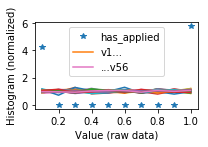

In [89]:
fig,ax = plt.subplots(figsize = (3,2))
for column in dfUser[:]:
    try:
        freqs,bins = np.histogram(dfUser[column],range = (0,1), density = True)
    except TypeError:
        print(column)
        pass
    if column == 'has_applied':
        plt.plot(bins[1:],freqs, '*',label = column)
    elif column == '1':
        plt.plot(bins[1:],freqs, label = 'v1...')
    elif column == '56':
        plt.plot(bins[1:],freqs, label = '...v56')
    else:
        plt.plot(bins[1:],freqs)
plt.legend(ncol = 1, loc = 'upper center')
plt.ylabel('Histogram (normalized)')
plt.xlabel('Value (raw data)')
plt.tight_layout()
plt.savefig('results/pdfsOfFeatures.pdf')
plt.show()
plt.close()


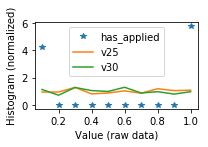

In [93]:
fig,ax     = plt.subplots(figsize = (3,2))
freqs,bins = np.histogram(dfUser['has_applied'],range = (0,1), density = True)
plt.plot(bins[1:],freqs, '*',label = 'has_applied',)

freqs,bins = np.histogram(dfUser['25'],range = (0,1), density = True)
plt.plot(bins[1:],freqs, label = 'v25')
freqs,bins = np.histogram(dfUser['30'],range = (0,1), density = True)
plt.plot(bins[1:],freqs, label = 'v30')


plt.legend(ncol = 1, loc = 'upper center')
plt.ylabel('Histogram (normalized)')
plt.xlabel('Value (raw data)')
plt.tight_layout()
#plt.savefig('results/pdfsOfFeatures.pdf')
plt.show()
plt.close()



Balance TargetVariable

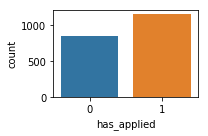

In [94]:
fig,ax = plt.subplots(figsize = (3,2))
sns.countplot(dfUser.has_applied,label="Sum")
plt.tight_layout()
plt.savefig('BalanceTargetVariable.pdf')
plt.show()

## Clean data

In [95]:
#Remove str
#dfUser.user_id =  dfUser.user_id.apply(lambda x : int(x[1:]))
#dfJobs.user_id = dfJobs.user_id.apply(lambda x : int(x[1:]))

#
dfUserNoNan = dfUser.apply(lambda x: x.fillna(x.mean()),axis=0)

## Kullback-Leibler divergence

Column smaller than 0.7 has_applied
Column smaller than 0.7 25
Column smaller than 0.7 30
0.41789498327315344
0.33327606501987167 0.4498811998660767


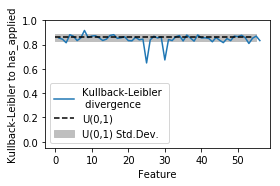

In [63]:
import scipy.stats

dfUser_Dropna25 = dfUser
dfUser_Dropna30 = dfUser

dfUser.dropna(subset= ['has_applied','25'], inplace=True)
dfUser_Dropna30.dropna(subset = ['has_applied','30','1'], inplace=True)



entropies = []
for column in dfUserNoNan:
    entropies.append(scipy.stats.entropy(dfUserNoNan.has_applied,dfUserNoNan[column]))
    if entropies[-1] < 0.7:
        print('Column smaller than 0.7', column)

#Calc uniform reference value
entropyUniform    = np.mean([scipy.stats.entropy(dfUserNoNan.has_applied,np.random.uniform(size=2000)) for i in range(50)])
entropyUniformStd = np.std([scipy.stats.entropy(dfUserNoNan.has_applied,np.random.uniform(size=2000)) for i in range(50)])


entropy25 = scipy.stats.entropy(dfUser_Dropna25.has_applied,dfUser_Dropna25['25'])
entropy30 = scipy.stats.entropy(dfUser_Dropna30.has_applied,dfUser_Dropna30['30'])
entropy1 = scipy.stats.entropy(dfUser_Dropna30.has_applied,dfUser_Dropna30['1'])


print(entropy25)
print(entropy30,entropy1)

#Plotting
fig,ax = plt.subplots(figsize = (4,2.6))
plt.plot(range(1,57),entropies[1:], label = 'Kullback-Leibler \n divergence')
plt.fill_between(range(len(entropies[1:])), entropyUniform-entropyUniformStd, entropyUniform+entropyUniformStd, color = '0.75', label = 'U(0,1) Std.Dev.')
plt.plot(range(len(entropies[2:])),np.ones(len(entropies[2:]))*entropyUniform, '--',color = 'k',label = 'U(0,1)')
#plt.plot(18,entropy25)
#plt.plot(23,entropy30, markersize = 15)
plt.ylim([-0.05,1])
plt.legend()
plt.tick_params(axis="x")
plt.xlabel('Feature')
plt.ylabel('Kullback-Leibler to has_applied')
plt.tight_layout()
plt.savefig('results/entropies.pdf')

## Jobs Data Frame

In [3]:
dfAll.groupby('has_applied').mean()

,v1,v10,v11,v12,v13,v14,v15,v16,v17,v18,...,v52,v53,v54,v55,v56,v6,v7,v8,v9,salary
has_applied,,,,,,,,,,,,,,,,,,,,,
0,0.490059,0.498821,0.523204,0.492008,0.493964,0.499825,0.494041,0.506272,0.494566,0.496815,...,0.502325,0.48093,0.509029,0.513518,0.495338,0.518608,0.503363,0.503356,0.512445,59461.038961
1,0.504270,0.488648,0.505342,0.498836,0.506773,0.497135,0.492674,0.496793,0.502081,0.496907,...,0.496945,0.49425,0.512282,0.500889,0.515721,0.517741,0.502857,0.480492,0.500611,60154.684096


## Jobs data individual check for prescribtive

In [97]:
dfJobs['has_applied']  = dfUser['has_applied']
dfJobs['Salary_Bool']  = np.where(dfJobs.salary.notnull(), 1, 0)
#dfJobs                 = pd.get_dummies(dfJobs, columns=['job_title_full'])  


In [98]:
dfAll.groupby('has_applied').mean()
dfJobs.groupby('has_applied').mean()

,salary,Salary_Bool
has_applied,,
0,59461.038961,0.181604
1,60154.684096,0.398438


In [175]:
dfJobs.head()

,job_title_full,salary,company,user_id,has_applied,Salary_Bool
0,junior manager innovation lab - france m/f/d,51000.0,g,U1,1,1
1,junior product manager - mobile,70000.0,b,U2,1,1
2,junior brand marketing manager - mobile m/f/d,59000.0,g,U3,1,1
3,product analyst - pricing & forecasting m/f/d,NaN,d,U4,1,0
4,online marketing manager,64000.0,h,U5,1,1


#### Look for keywords

In [179]:
def AddBinaryString(df,ListOfStrings):
    for string in ListOfStrings:
        if string == '-' or 'new':
            pass
        else:
            dfJobs['Contains_'+string] = dfJobs['job_title_full'].str.find(string)
            dfJobs['Contains_'+string] = np.where(dfJobs['Contains_'+string]>-1.,1,0)
    return(df)

from collections import Counter
ListOfMostCommonWords = Counter(" ".join(dfJobs["job_title_full"]).split()).most_common(100)

ListOfStrings = [entry for entry, count in ListOfMostCommonWords if count > 100]
print(ListOfStrings)

#ListOfStrings            = ['Manager','Junior','Senior', 'Lead', 'Remote', 'M/F', 'Backend','Analyst']
dfJobs                   = AddBinaryString(dfJobs,ListOfStrings)


['-', 'manager', 'm/f/d', 'junior', 'senior', 'lead', 'marketing', 'new', 'ventures', 'remote', 'data', 'engineer', 'product', 'pricing', 'analyst', 'seo', 'learning', 'france', 'nlp', 'mobile', 'brand', 'backend', 'scientist']


#### Group by target: Individual check

In [177]:
dfJobs.groupby('has_applied').mean()

,salary,Salary_Bool,Contains_manager,Contains_m/f/d,Contains_junior,Contains_senior,Contains_lead,Contains_marketing,Contains_new,Contains_ventures,Contains_remote,Contains_data,Contains_engineer,Contains_product,Contains_pricing,Contains_analyst,Contains_seo,Contains_learning,Contains_france,Contains_nlp,Contains_mobile,Contains_brand,Contains_backend,Contains_scientist
has_applied,,,,,,,,,,,,,,,,,,,,,,,,
0,59461.038961,0.181604,0.516509,0.436321,0.251179,0.267689,0.251179,0.222877,0.199292,0.199292,0.175708,0.145047,0.114387,0.061321,0.073113,0.083726,0.087264,0.086085,0.067217,0.055425,0.056604,0.047170,0.053066,0.058962
1,60154.684096,0.398438,0.473958,0.452257,0.263889,0.246528,0.232639,0.193576,0.164931,0.164931,0.162326,0.127604,0.131076,0.164931,0.117188,0.107639,0.068576,0.065972,0.065104,0.072049,0.064236,0.059028,0.053819,0.047743


Heatmap Keywords

,salary,has_applied,Salary_Bool,Contains_manager,Contains_m/f/d,Contains_junior,Contains_senior,Contains_lead,Contains_marketing,Contains_new,Contains_ventures,Contains_remote,Contains_data,Contains_engineer,Contains_product,Contains_pricing,Contains_analyst,Contains_seo,Contains_learning,Contains_france,Contains_nlp,Contains_mobile,Contains_brand,Contains_backend,Contains_scientist
salary,1.000000,0.050925,NaN,-0.040874,-0.038652,0.044096,0.005747,0.018940,-0.021810,0.022982,0.022982,-0.020847,-0.045126,0.041686,0.103752,0.051456,0.004827,0.001993,0.021667,-0.029358,-0.006753,0.061900,-0.058384,0.010224,-0.108984
has_applied,0.050925,1.000000,0.232425,-0.042062,0.015845,0.014346,-0.023977,-0.021438,-0.035804,-0.044249,-0.044249,-0.017688,-0.025226,0.025025,0.157003,0.073093,0.039838,-0.034746,-0.037853,-0.004205,0.033325,0.015760,0.025928,0.001655,-0.024859
Salary_Bool,NaN,0.232425,1.000000,0.009554,0.004164,0.003814,0.020834,-0.021382,0.039478,-0.022702,-0.022702,0.017451,-0.043653,-0.003330,0.019377,-0.012303,-0.002806,-0.024051,-0.015151,-0.028209,0.009480,0.029939,0.033099,0.015444,0.008838
Contains_manager,-0.040874,-0.042062,0.009554,1.000000,-0.010810,0.033434,0.024280,-0.038967,0.431022,0.277212,0.277212,-0.054337,-0.230742,-0.370262,-0.208731,-0.291739,-0.323467,0.074217,-0.279216,0.270114,-0.259479,0.200485,0.242773,-0.233974,-0.231654
Contains_m/f/d,-0.038652,0.015845,0.004164,-0.010810,1.000000,-0.101846,0.099989,-0.021856,-0.008820,-0.091575,-0.091575,-0.104101,0.161075,-0.059472,-0.008671,0.115580,0.105563,0.025883,-0.108726,-0.076198,-0.024137,0.019541,0.035100,0.001482,-0.003507
Contains_junior,0.044096,0.014346,0.003814,0.033434,-0.101846,1.000000,-0.345890,-0.332253,-0.038128,0.009518,0.009518,-0.002615,0.014053,-0.010770,-0.012456,-0.034203,-0.043919,0.019118,-0.037041,0.252428,-0.012068,0.026069,-0.029903,0.016953,0.029994
Contains_senior,0.005747,-0.023977,0.020834,0.024280,0.099989,-0.345890,1.000000,-0.329653,0.027592,-0.023075,-0.023075,0.015798,-0.006659,-0.015180,-0.016982,-0.012825,-0.003179,-0.013334,-0.126915,-0.095700,0.045503,0.003971,0.022348,-0.027197,0.000887
Contains_lead,0.018940,-0.021438,-0.021382,-0.038967,-0.021856,-0.332253,-0.329653,1.000000,-0.003141,0.105660,0.105660,-0.036950,0.020764,0.008363,0.006453,0.069182,0.012236,0.031706,0.201228,-0.116603,-0.058204,-0.030996,0.015663,0.011783,-0.048533
Contains_marketing,-0.021810,-0.035804,0.039478,0.431022,-0.008820,-0.038128,0.027592,-0.003141,1.000000,0.351289,0.351289,0.158013,-0.201225,-0.191638,-0.188983,-0.168368,-0.021547,0.095269,-0.144515,-0.135401,-0.134299,0.216277,0.201032,-0.121099,-0.119898
Contains_new,0.022982,-0.044249,-0.022702,0.277212,-0.091575,0.009518,-0.023075,0.105660,0.351289,1.000000,1.000000,-0.210177,-0.184779,-0.175975,-0.173537,-0.154607,-0.039540,0.144780,-0.132704,-0.124334,-0.123323,-0.119213,0.153414,-0.111201,-0.110099


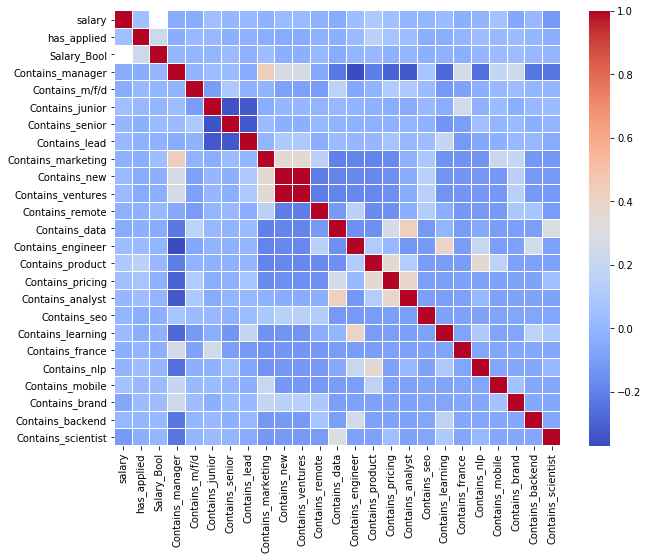

In [178]:
plt.figure(figsize = (10,8))
g = sns.heatmap(dfJobs.corr(),annot=False, fmt = ".2f", cmap = "coolwarm",linewidths= 0.01)
plt.savefig('results/correlationKEYWORDS100Describptions_Seaborn.pdf')
dfJobs.corr()

### Keywords in jobdescr

In [161]:
from collections import Counter
#dfJobs.job_title_full = dfJobs.job_title_full.str.replace('(', ' ')
#dfJobs.job_title_full = dfJobs.job_title_full.str.replace(')', ' ')
#dfJobs.job_title_full.str.lower()
ListOfMostCommonWords = Counter(map(str.lower, " ".join(dfJobs["job_title_full"]).split())).most_common(100)
print(ListOfMostCommonWords)

ListOfStrings = [entry for entry, count in ListOfMostCommonWords if count > 100]
print(ListOfStrings)

[('-', 1684), ('manager', 984), ('m/f/d', 891), ('junior', 517), ('senior', 511), ('lead', 481), ('marketing', 412), ('new', 359), ('ventures', 359), ('remote', 336), ('data', 270), ('engineer', 248), ('product', 242), ('pricing', 197), ('analyst', 195), ('seo', 153), ('learning', 149), ('france', 132), ('nlp', 130), ('mobile', 122), ('brand', 108), ('backend', 107), ('scientist', 105), ('developer', 99), ('deep', 97), ('growth', 95), ('consultant', 87), ('supplier', 85), ('financing', 85), ('software', 82), ('&', 80), ('forecasting', 80), ('ui', 67), ('designer', 67), ('online', 66), ('big', 64), ('apac', 62), ('ai', 60), ('researcher', 60), ('onboarding', 60), ('marketeer', 58), ('team', 57), ('policy', 56), ('affairs', 56), ('/', 55), ('ux', 55), ('internal', 55), ('audit', 55), ('sustainability', 54), ('science', 54), ('culture', 54), ('machine', 52), ('hacker', 51), ('frontend', 51), ('offline', 49), ('business', 49), ('development', 49), ('shop', 48), ('performance', 47), ('innov